In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

In [3]:
train = h5py.File('train_happy.h5')
test = h5py.File('test_happy.h5')

In [6]:
X_train_orig = np.array(train['train_set_x'])
Y_train_orig = np.array(train['train_set_y'])

In [7]:
X_test_orig = np.array(test['test_set_x'])
Y_test_orig = np.array(test['test_set_y'])

In [8]:
classes = [0,1]

In [9]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

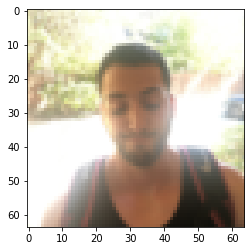

In [15]:
index = 129
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [40]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential()
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            
    model.add(tf.keras.layers.ZeroPadding2D(padding=(3,3),input_shape=(64,64,3)))#,data_format="channels_last"))
            ## Conv2D with 32 7x7 filters and stride of 1
    model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(7,7),strides=(1,1),padding="valid"))
            ## BatchNormalization for axis 3
    model.add(tf.keras.layers.BatchNormalization(axis=3))
            ## ReLU
    model.add(tf.keras.layers.ReLU())
            ## Max Pooling 2D with default parameters
    model.add(tf.keras.layers.MaxPool2D())
            ## Flatten layer
    model.add(tf.keras.layers.Flatten())
            ## Dense layer with 1 unit for output & 'sigmoid' activation
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    
    return model

In [41]:
happy_model = happyModel()

### Adam optimizer & Binary Crossentropy loss

In [43]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [44]:
happy_model_history = happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 48ms/step - loss: 1.2950 - accuracy: 0.6983
Epoch 2/10
38/38 [==============================] - 2s 46ms/step - loss: 0.2378 - accuracy: 0.9033
Epoch 3/10
38/38 [==============================] - 2s 48ms/step - loss: 0.1256 - accuracy: 0.9533
Epoch 4/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1357 - accuracy: 0.9417
Epoch 5/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1375 - accuracy: 0.9483
Epoch 6/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1599 - accuracy: 0.9383
Epoch 7/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1135 - accuracy: 0.9650
Epoch 8/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0765 - accuracy: 0.9667
Epoch 9/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0754 - accuracy: 0.9683
Epoch 10/10
38/38 [==============================] - 2s 46ms/step - loss: 0.1092 - accuracy: 0.9633


In [45]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [49]:
eval = happy_model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 21ms/step - loss: 0.4170 - accuracy: 0.8000


In [50]:
print ("\nTest Accuracy = " + str(eval[1]))
print ("Loss = " + str(eval[0]))


Test Accuracy = 0.800000011920929
Loss = 0.4170490503311157


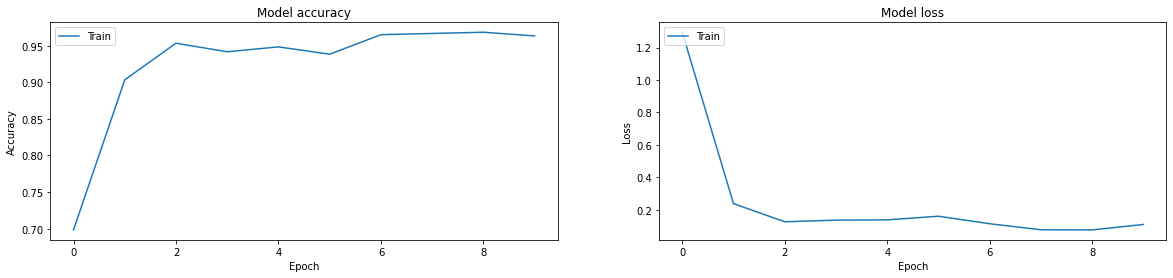

In [51]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(happy_model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(happy_model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()